In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

from gym import QECGym
from utils import moving_average

# Mask

Using random seed for stim: 6402252940742886642


/var/folders/k_/8bz49cqs0vl0jbjp9zhkynym0000gn/T/ipykernel_47910/4181606542.py:12: RuntimeWarning: divide by zero encountered in log
  M = np.log(D@D.T)


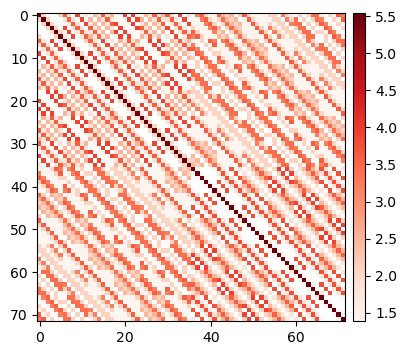

In [2]:
gym = QECGym(
    "bbc-72-12-6",
    "X",
    "circuit",
    0.01,
    6,
    False,
    True,
    False,
)
D = gym.get_spacetime_parity_check_matrix().astype(np.uint32)
M = np.log(D@D.T)

fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(M[72:144, 72:144], cmap='Reds')
cax = fig.add_axes(
    [
        ax.get_position().x1 + 0.02,
        ax.get_position().y0,
        0.03,
        ax.get_position().height
    ]
)
fig.colorbar(im, cax=cax)
plt.show()

# $[[72,12,6]]$ Code

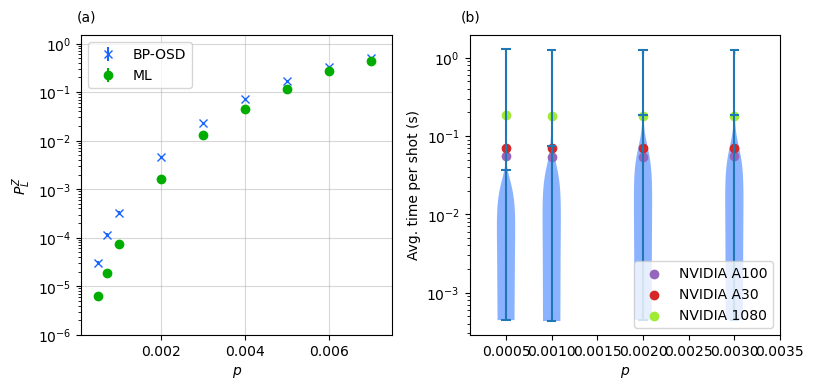

In [3]:
bp_osd_data1 = pd.read_csv("data/bp_osd_lers_cnbbc-72-12-6_loX_ntcircuit_mbFalse_nr6.csv")
bp_osd_data2 = pd.read_csv("data/bp_osd_lers_cnbbc-72-12-6_loX_ntcircuit_mbFalse_nr6.low_ers.csv")
bp_osd_data = pd.concat([bp_osd_data1, bp_osd_data2])
bp_osd_ler = bp_osd_data["logical_errors"] / bp_osd_data["total_shots"]
bp_osd_std = np.sqrt(bp_osd_ler * (1 - bp_osd_ler) / bp_osd_data["total_shots"])

ml_data1 = pd.read_csv("data/1-1-25/results_64474167-0.csv")
ml_data2 = pd.read_csv("data/1-1-25/results_64474167-1.csv")
ml_data3 = pd.read_csv("data/1-1-25/results_64474167-2.csv")
ml_data4 = pd.read_csv("data/1-1-25/results_64474167-3.csv")
ml_data5 = pd.read_csv("data/1-1-25/results_64474167-4.csv")
ml_data6 = pd.read_csv("data/1-1-25/results_64474167-5.csv")
ml_data7 = pd.read_csv("data/1-1-25/results_64474167-10.csv")
ml_data8 = pd.read_csv("data/1-1-25/results_64474167-11.csv")
ml_data9 = pd.read_csv("data/1-1-25/results_64474167-12.csv")
ml_data10 = pd.read_csv("data/1-1-25/results_64474167-13.csv")
ml_data11 = pd.read_csv("data/1-1-25/results_64474167-14.csv")
ml_data12 = pd.read_csv("data/1-1-25/results_64474167-15.csv")
ml_data13 = pd.read_csv("data/1-1-25/results_64474167-16.csv")
ml_data14 = pd.read_csv("data/1-1-25/results_64474167-17.csv")
ml_data15 = pd.read_csv("data/1-1-25/results_64474167-18.csv")

ml_data = pd.concat([ml_data1, ml_data2, ml_data3, ml_data4, ml_data5, ml_data6, ml_data7, ml_data8, ml_data9, ml_data10, ml_data11, ml_data12, ml_data13, ml_data14, ml_data15])
ml_data = ml_data.groupby('error_rate').agg('sum')
ml_ler = ml_data["logical_errors"] / ml_data["num_shots"]
ml_std = np.sqrt(ml_ler * (1 - ml_ler) / ml_data["num_shots"])

times_o0_p0005_1 = np.load("data/1-20-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1978556_rank0.npy")
times_o0_p0005_2 = np.load("data/1-21-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1980274_rank0.npy")
times_o0_p0005 = np.hstack((times_o0_p0005_1, times_o0_p0005_2))
times_o0_p001_1 = np.load("data/1-20-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1978557_rank0.npy")
times_o0_p001_2 = np.load("data/1-21-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1980275_rank0.npy")
times_o0_p001 = np.hstack((times_o0_p001_1, times_o0_p001_2))
times_o0_p002_1 = np.load("data/1-20-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1978558_rank0.npy")
times_o0_p002_2 = np.load("data/1-21-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1980276_rank0.npy")
times_o0_p002 = np.hstack((times_o0_p002_1, times_o0_p002_2))
times_o0_p003_1 = np.load("data/1-20-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1978559_rank0.npy")
times_o0_p003_2 = np.load("data/1-21-25/times_bp_osd_72-12-6_loX_ntcircuit_nr6_osd_order0_ji1980277_rank0.npy")
times_o0_p003 = np.hstack((times_o0_p002_1, times_o0_p002_2))
data = np.vstack((times_o0_p0005, times_o0_p001, times_o0_p002, times_o0_p003))


fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax1.errorbar(bp_osd_data["p"], bp_osd_ler, yerr=bp_osd_std, fmt="x", label="BP-OSD", color=(25/255, 102/255, 1.0))
ax1.errorbar(ml_data.index, ml_ler, yerr=ml_std, label="ML", fmt='o', color=(0/255, 173/255, 0/255))
ax1.grid(alpha=0.5)
ax1.semilogy()
ax1.legend()
ax1.set_xlabel("$p$")
ax1.set_ylabel("$P_L^Z$")
ax1.set_xlim(1e-4, 7.5e-3)
ax1.set_ylim(1e-6, 1.5)
ax1.text(0, 3, "(a)")

times_a30 = pd.read_csv("data/1-1-25/results_64474167-22.csv")
times_1080 = pd.read_csv("data/1-1-25/results_64474167-23.csv")
times_a100 = pd.read_csv("data/1-1-25/results_64474167-24.csv")


ax2 = fig.add_subplot(1,2,2)
parts = ax2.violinplot(data.T, showmeans=True, points=500, positions=[0.0005, 0.001, 0.002, 0.003], widths=0.0002)
for pc in parts['bodies']:
    pc.set_facecolor((25/255, 102/255, 1.0))
    #pc.set_edgecolor('black')
    pc.set_alpha(0.5)
ax2.scatter(times_a100["error_rate"], times_a100["time"] / times_a100["num_shots"], label="NVIDIA A100", color="tab:purple")
ax2.scatter(times_a30["error_rate"], times_a30["time"] / times_a30["num_shots"], label="NVIDIA A30",color="tab:red")
ax2.scatter(times_1080["error_rate"], times_1080["time"] / times_1080["num_shots"], label="NVIDIA 1080", color=(160/255, 235/255, 51/255))
ax2.set_ylabel("Avg. time per shot (s)")
ax2.set_xlabel(r"$p$")
ax2.set_xlim(0.0001, 0.0035)
ax2.semilogy()
ax2.legend()
ax2.text(0, 3, "(b)")
plt.tight_layout()
plt.show()

# Multiple Rounds

LinregressResult(slope=6.799196326239532e-05, intercept=-8.780574928210353e-05, rvalue=0.9999247146786752, pvalue=7.528532132483613e-05, stderr=5.899799582668951e-07, intercept_stderr=7.134855734817194e-06)


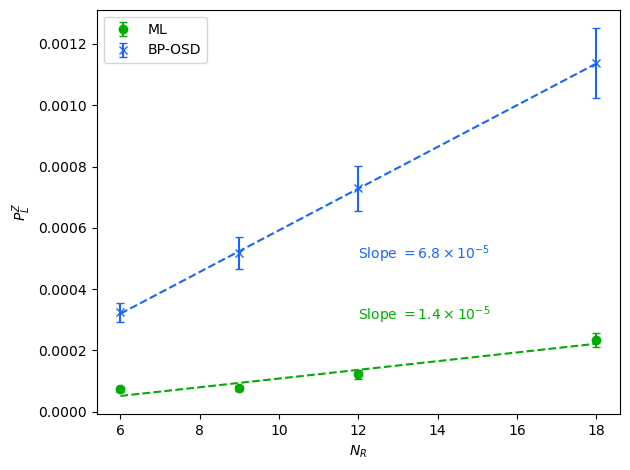

In [4]:
rounds_18_data = pd.read_csv("data/1-23-25/results_2001004-0.csv")
rounds_18_data["num_rounds"] = pd.Series([18])

rounds_12_data = pd.read_csv("data/1-19-25/results_1960534-0.csv")
rounds_12_data["num_rounds"] = pd.Series([12])

rounds_9_data = pd.read_csv("data/1-19-25/results_1960239-2.csv")
rounds_9_data["num_rounds"] = pd.Series([9])

rounds_6_data = pd.DataFrame({
    "error_rate": [0.001],
    "num_shots": [ml_data["num_shots"][0.001]],
    "logical_errors": [ml_data["logical_errors"][0.001]],
    "num_rounds": [6],
})
all_rounds_data_ml = pd.concat((rounds_6_data, rounds_9_data, rounds_12_data, rounds_18_data))

ml_ler = all_rounds_data_ml["logical_errors"] / all_rounds_data_ml["num_shots"]
res_ml = linregress(all_rounds_data_ml["num_rounds"], ml_ler)
ml_std_devs = np.sqrt(ml_ler * (1 - ml_ler) / all_rounds_data_ml["num_shots"])

bp_osd_dfs = []
for r in [9, 12, 18]:
    bp_osd_dfs.append(pd.read_csv(f"data/1-6-25/bp_osd_lers_cnbbc-72-12-6_loX_ntcircuit_mbFalse_nr{r}_p0.001.csv"))

bp_osd_dfs.insert(
    0,
    pd.DataFrame({
        "num_rounds": [6],
        "p": [0.001],
        "total_shots": bp_osd_data["total_shots"][0:1],
        "logical_errors": bp_osd_data["logical_errors"][0:1],
    })
)
all_rounds_data_bp = pd.concat(bp_osd_dfs)

bp_ler = all_rounds_data_bp["logical_errors"] / all_rounds_data_bp["total_shots"]
res_bp = linregress(all_rounds_data_bp["num_rounds"], bp_ler)
print(res_bp)
bp_std_devs = np.sqrt(bp_ler * (1 - bp_ler) / all_rounds_data_bp["total_shots"])

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.errorbar(all_rounds_data_ml["num_rounds"], ml_ler, yerr=ml_std_devs, label="ML", fmt='o', color=(0/255, 173/255, 0/255), capsize=3)
ax.plot(all_rounds_data_ml["num_rounds"], res_ml.slope * all_rounds_data_ml["num_rounds"] + res_ml.intercept, "--", color=(0/255, 173/255, 0/255))
ax.text(12, 0.0003, r"Slope $= 1.4 \times 10^{-5}$", color=(0/255, 173/255, 0/255))

ax.errorbar(all_rounds_data_bp["num_rounds"], bp_ler, yerr=bp_std_devs, fmt="x", label="BP-OSD", color=(25/255, 102/255, 1.0), capsize=3)
ax.plot(all_rounds_data_bp["num_rounds"], res_bp.slope * all_rounds_data_bp["num_rounds"] + res_bp.intercept, "--", color=(25/255, 102/255, 1.0))
ax.text(12, 0.0005, r"Slope $= 6.8 \times 10^{-5}$", color=(25/255, 102/255, 1.0))
ax.set_xlabel(r"$N_R$")
ax.set_ylabel(r"$P_L^Z$")

plt.legend()
plt.tight_layout()
plt.show()

# $[[144,12,12]]$

(50000,)
(50000,)
(50000,)
(50000,)
3.4529475361266173


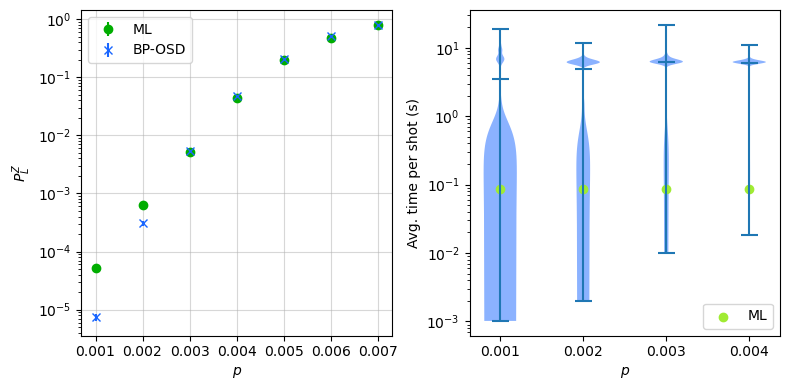

In [5]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
bp_osd_data1 = pd.read_csv("data/11-14-24/bp_osd_lers_cnbbc-144-12-12_loX_ntcircuit_mbFalse_nr12.csv")
bp_osd_data2 = pd.read_csv("data/12-10-24/bp_osd_lers_cnbbc-144-12-12_loX_ntcircuit_mbFalse_nr12.csv")
bp_osd_data3 = pd.read_csv("data/12-14-24/bp_osd_lers_cnbbc-144-12-12_loX_ntcircuit_mbFalse_nr12_p0.002.csv")
bp_osd_data4 = pd.read_csv("data/2-17-25/bp_osd_lers_cnbbc-144-12-12_loX_ntcircuit_mbFalse_nr12_p0.002.csv")
bp_osd_data5 = pd.read_csv("data/2-17-25/bp_osd_lers_cnbbc-144-12-12_loX_ntcircuit_mbFalse_nr12_p0.001.csv")
bp_osd_data = pd.concat([bp_osd_data1, bp_osd_data2, bp_osd_data3, bp_osd_data4, bp_osd_data5])
bp_osd_data = bp_osd_data.groupby('p').agg('sum')
# print(bp_osd_data)
bp_osd_ler = bp_osd_data["logical_errors"] / bp_osd_data["total_shots"]
bp_osd_std = np.sqrt(bp_osd_ler * (1 - bp_osd_ler) / bp_osd_data["total_shots"])

ml_data1 = pd.read_csv("data/2-5-25/results_2397724-0.csv")
ml_data2 = pd.read_csv("data/2-5-25/results_2397724-1.csv")
ml_data3 = pd.read_csv("data/2-5-25/results_2397724-2.csv")
ml_data4 = pd.read_csv("data/2-5-25/results_2397724-3.csv")
ml_data = pd.concat([ml_data1, ml_data2, ml_data3, ml_data4])
ml_data = ml_data.groupby('error_rate').agg('sum')

ml_lers = ml_data["logical_errors"] / ml_data["num_shots"]

ml_std = np.sqrt(ml_lers * (1 - ml_lers) / ml_data["num_shots"])
ax1.errorbar(ml_data.index, ml_lers, yerr=ml_std, label="ML", fmt='o', color=(0/255, 173/255, 0/255))
ax1.errorbar(bp_osd_data.index, bp_osd_ler, yerr=bp_osd_std, fmt="x", label="BP-OSD", color=(25/255, 102/255, 1.0))
ax1.semilogy()
ax1.grid(alpha=0.5)
ax1.legend()
ax1.set_xlabel("$p$")
ax1.set_ylabel("$P_L^Z$")

ax2 = fig.add_subplot(1, 2, 2)
list001 = []
for i in range(50):
    arr = np.load(f"data/2-21-25/bposd_data1/times_bp_osd_144-12-12_loX_ntcircuit_nr12_osd_order0_ji2077899_rank{i+1}_p0.001.npy")
    list001.append(arr)
times_o0_p001 = np.hstack(list001)
print(times_o0_p001.shape)

list002 = []
for i in range(50):
    arr = np.load(f"data/2-21-25/bposd_data2/times_bp_osd_144-12-12_loX_ntcircuit_nr12_osd_order0_ji2077963_rank{i+1}_p0.002.npy")
    list002.append(arr)
times_o0_p002 = np.hstack(list002)
print(times_o0_p002.shape)

list003 = []
for i in range(50):
    arr = np.load(f"data/2-21-25/bposd_data3/times_bp_osd_144-12-12_loX_ntcircuit_nr12_osd_order0_ji2078720_rank{i+1}_p0.003.npy")
    list003.append(arr)
times_o0_p003 = np.hstack(list003)
print(times_o0_p003.shape)
list004 = []
for i in range(50):
    arr = np.load(f"data/2-22-25/bposd_data1/times_bp_osd_144-12-12_loX_ntcircuit_nr12_osd_order0_ji2079512_rank{i+1}_p0.004.npy")
    list004.append(arr)
times_o0_p004 = np.hstack(list004)
print(times_o0_p004.shape)
data = np.vstack((times_o0_p001, times_o0_p002, times_o0_p003, times_o0_p004))
print(np.mean(times_o0_p001))

times_ml = pd.read_csv("data/2-5-25/results_2397724-5.csv")

parts = ax2.violinplot(data.T, showmeans=True, points=500, positions=[0.001, 0.002, 0.003, 0.004], widths=0.0004)
for pc in parts['bodies']:
    pc.set_facecolor((25/255, 102/255, 1.0))
    #pc.set_edgecolor('black')
    pc.set_alpha(0.5)
ax2.set_ylabel("Avg. time per shot (s)")
ax2.set_xlabel(r"$p$")
ax2.semilogy()
ax2.scatter(times_ml["error_rate"], times_ml["time"] / times_ml["num_shots"], label="ML", color=(160/255, 235/255, 51/255))
ax2.legend(loc="lower right")

plt.tight_layout()
plt.show()

<!-- # Training Curves -->

# Loss curves, Mask vs. No Mask

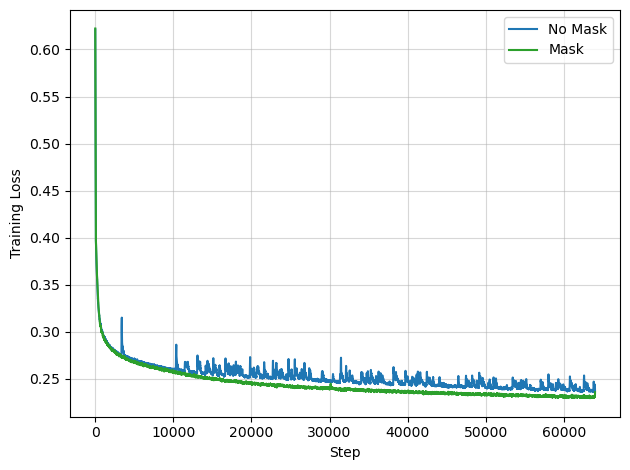

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
mask_losses = np.load("data/3-7-25/2092113update_training_losses.npy")
no_mask_losses = np.load("data/3-7-25/2092161update_training_losses.npy")
ax.plot(moving_average(no_mask_losses, 50), label="No Mask")
ax.plot(moving_average(mask_losses, 50), label="Mask", color='tab:green')
ax.grid(alpha=0.5)
# ax.semilogy()
ax.legend()
ax.set_xlabel("Step")
ax.set_ylabel("Training Loss")
plt.tight_layout()
plt.show()